# Advanced Linear Regression
<br/>
# Improving the fit - Cross Validation

## Cross Validation

Until now, we have been training the model with a dataset and measuring the performance on the same dataset. This isnt a good way to measure the performance of a model as in reality the test set is different from the training dataset. Hence, the performance on the test set is the right way to evaluate how good the model is. Since test sets are not always available, evaluating the model on the data it hasn't been trained on will provide a true estimate of the performance. Cross Validation is a technique of splitting the input data set into training and test set with a ratio where majority is the training set. A one way split might not train the model for all the variance. Hence, we go on splitting the data set in different parts so that each time the test set is different from the previous split. The cross-validation splits are shown in the figure below. If we consider k splits, it is called as k-fold cross validation. K-fold cross validation will train k different models and evaluate the performance on k different test sets and consider the mean of all the errors as the benchmark performance error. Below is the visualization of how train-test splits are selected by varying the  window so that the model is evaluated with all different portions of data.

<br/><br/>
<div style='float: left;'><img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2017/03/15/vis_7.png'/></div>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

## Cross Validation using sklearn

cross validation is available in sklearn. Let us perform a 5-fold cross_validation on the Boston Housing dataset.


## Crosss Validation (CV) using Scikit-Learn

Import cross_validation and metrics function from sklearn. cross_validation is to perform CV on the dataset and metrics is used to evaluate the performance using the mean_squared_error function that it offers.

```python
import numpy as np
from sklearn import cross_validation, metrics
```
The target is the Housing Price variable 'MEDV' which we shall assign to the variable y.

```python
y = boston_data['MEDV']
```
Instantiate a 5 fold split using the KFold function on the boston_data:

```python
k_folds = cross_validation.KFold(len(boston_data), n_folds=5, shuffle=True)
```

What the above command does is that it creates pairs of train and test indices that splits the dataset as explained in the illustration above. Hence we have 5 pairs of such splits of training and testing data over various parts. We can now iterate over all the parts and evaluate the Mean Squared Error (MSE) over each such split. We shall use a scores list to append all the MSEs for each such split. The iloc function over the dataframe can reference the values by index. Therefore, the part of the dataset where testing data or 'unseen' data is provided by KFold function can be accessed.

```python
scores = []
for train_index, test_index in k_folds:
    lm = linear_model.LinearRegression().fit(boston_data.iloc[train_index], y.iloc[train_index])
    y_hat = lm.predict(boston_data.iloc[test_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], y_hat))
```
Taking the mean of all such MSEs over all splits will give us a value that we can use to 'honestly' evaluate our model:

```python
print(np.mean(scores))
```

<br/>
### Instructions
\# Peform k-fold cross validation where k=3 without randomizing the dataset and determine:

- Mean scores and assign it to mean_scores variable. 
- Set the variables with _var appropriately.

In [2]:
from sklearn import feature_selection, cross_validation, metrics
from sklearn import datasets, linear_model
from matplotlib import rcParams
import statsmodels.formula.api as sm


import numpy as np
import pandas as pd
import seaborn as sns

boston_dataset = datasets.load_boston()
boston_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_data['MEDV'] = boston_dataset.target


In [3]:
# Perform linear regression using sklearn
reg_model = linear_model.LinearRegression()
X = boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston_data['MEDV']
reg_model.fit(X, y)

n_fold_var = 3
shuffle_var = False

k_folds = cross_validation.KFold(len(boston_data), n_folds= n_fold_var, shuffle= shuffle_var)
scores = []
for train_index, test_index in k_folds:
    lm = linear_model.LinearRegression().fit(boston_data.iloc[train_index], y.iloc[train_index])
    y_hat = lm.predict(boston_data.iloc[test_index])
    scores.append(metrics.mean_squared_error(y.iloc[test_index], y_hat))

mean_scores = np.mean(scores)
print(mean_scores)

5.84139997484e-28


In [3]:
ref_tmp_var = False

try:
    ref_assert_var = False
    if (n_fold_var == 3) and (shuffle_var is False):
      ref_assert_var = True
      ref_tmp_var = True
    else:
      ref_assert_var = False
      print('Please follow the instructions given and use the same variables provided in the instructions. ')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions. ')

assert ref_tmp_var

Please follow the instructions given and use the same variables provided in the instructions. 



<br/><br/><br/>
# Regression using Scikit-Learn

Scikit-Learn can also be used for linear regression. 

```python
from sklearn import linear_model, feature_selection
reg_model = linear_model.LinearRegression()
X = boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston_data['MEDV']
reg_model.fit(X, y)
p_values = feature_selection.f_regression(X, y)[1]
residuals = (y-reg_model.predict(X)).values
```
The residuals are errors and we can plot a distribution of these errors using distplot:

```python
g = sns.distplot(residuals, color="m")
sns.plot.show()
```
<br/>
<div style='float: left;'><img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/26/figure_6.png'/></div>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

The residuals follow closely resembles gaussian distribution which shows that the data is good for modeling using linear regression.

<br/>
## Visualizing Regression Line Fit 
The linear regression fits a line to the data set. We can visualize the line when a single variable is involved in the modeling. We can henceforth, imagine a hyper-plane extended in several dimensions. Going back to the modeling of housing rate with crime rate variable, specifying kind argument as "reg" in the jointplot, the best line that is fit can be seen.

```python
sns.jointplot(x="CRIM", y="MEDV", data=boston_data, kind="reg")
```
<br/>
<div style='float: left;'><img src='https://s3.amazonaws.com/rfjh/media/CKEditorImages/2016/11/26/figure_7.png'/></div>
<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

The line in the above figure shows the best fit to the crime rate for predicting housing prices. 

<br/>
### Instructions

Model the house prices for percent of lower status of the population using scikit-learn.

- Also generate a joint plot for the above data and assign the plot to g.
- Determine mean squared error and assign it to mse_lm


In [8]:
from sklearn import linear_model, feature_selection
from sklearn.metrics import mean_squared_error

# Modify the code below to predict housing prices for LSTAT


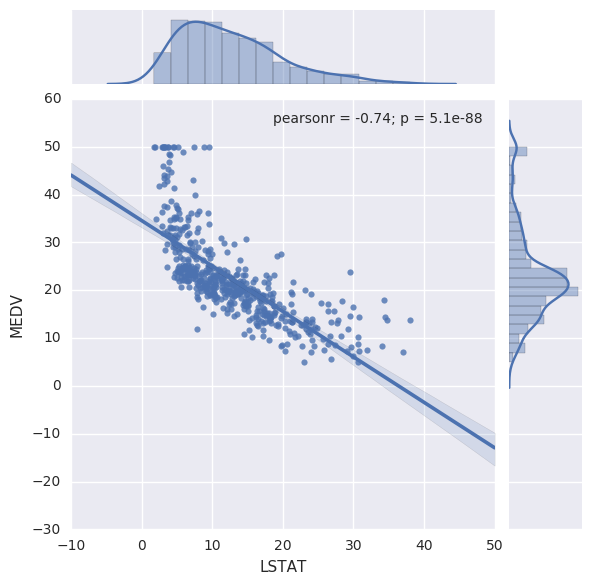

In [9]:
reg_model = linear_model.LinearRegression()
X = boston_data[['LSTAT']]
y = boston_data['MEDV']
reg_model.fit(X, y)
p_values = feature_selection.f_regression(X, y)[1]
y_hat = reg_model.predict(X)
mse_lm = mean_squared_error(y_hat, y)
g = sns.jointplot(x="LSTAT", y="MEDV", data=boston_data, kind="reg")

In [4]:
ref_tmp_var = False

try:
    ref_assert_var = False

    g_ = sns.jointplot(x="LSTAT", y="MEDV", data=boston_data, kind="reg")

    ref_assert_var = False

    ref_assert_var = True

    comp_ = [g_.y == g.y]
    for i in comp_[0]:
      if i == False:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions. ')

    if (abs(mse_lm - 38.48296) < 0.01):
      ref_assert_var = True
      ref_tmp_var = True
      out = sns.plt
    else:
      ref_assert_var = False
      print('Please follow the instructions given and use the same variables provided in the instructions. ')
        
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions. ')

assert ref_tmp_var

Please follow the instructions given and use the same variables provided in the instructions. 
